In [6]:
import sys 
sys.path.append("..")
from src.dataset import Dataset
import pandas as pd
import os
from definitions import get_synthetic_splits
from matplotlib import rc
rc('text', usetex=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [7]:
# # dataset_generator = Dataset("compas", ignore_features=["id", "age_cat", "priors_count.1", "violent_recid"])
# dataset = "adult"
# dataset_generator = Dataset(dataset)
# target = dataset_generator.target
# SAMPLING_METHOD = "class_protected"
# GENERATION_METHOD = "cart"
r'$\bf{Bold}$ Title'
nice_dataset_names = {"adult": r"$\textbf{Adult}$" +" dataset"}
sampling_methods = ['class', 'class_protected', 'protected', 'same_class']
sampling_methods_names = ['class', 'class \&\\ protected', 'protected', 'class (ratio)']



In [8]:
dataset_generator = Dataset("adult")
target = dataset_generator.target
df = dataset_generator.original_dataframe

Dataset adult_fnlwgt_educational-num has ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'] categorical and ['age', 'capital-gain', 'capital-loss', 'hours-per-week'] numerical columns.


In [9]:
class PercentageCalculator:
    def __init__(self, percentages_sex):
        self.percentages_sex = percentages_sex
        self.counter = 0
    
    def calculate_percentage(self, p):
        percentage = p * self.percentages_sex[self.counter] / 100
        print(p, self.percentages_sex[self.counter], percentage)

        self.counter = (self.counter + 1) % len(self.percentages_sex)
        return '{:.1f}%'.format(percentage)

/tmp/ipykernel_19155/3335953027.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['sex', 'race', target]).size().reset_index(name='count')
/tmp/ipykernel_19155/3335953027.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  race_counts = df.groupby(['sex', 'race']).size()
/tmp/ipykernel_19155/3335953027.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_counts = df.groupby(['sex', 'race'

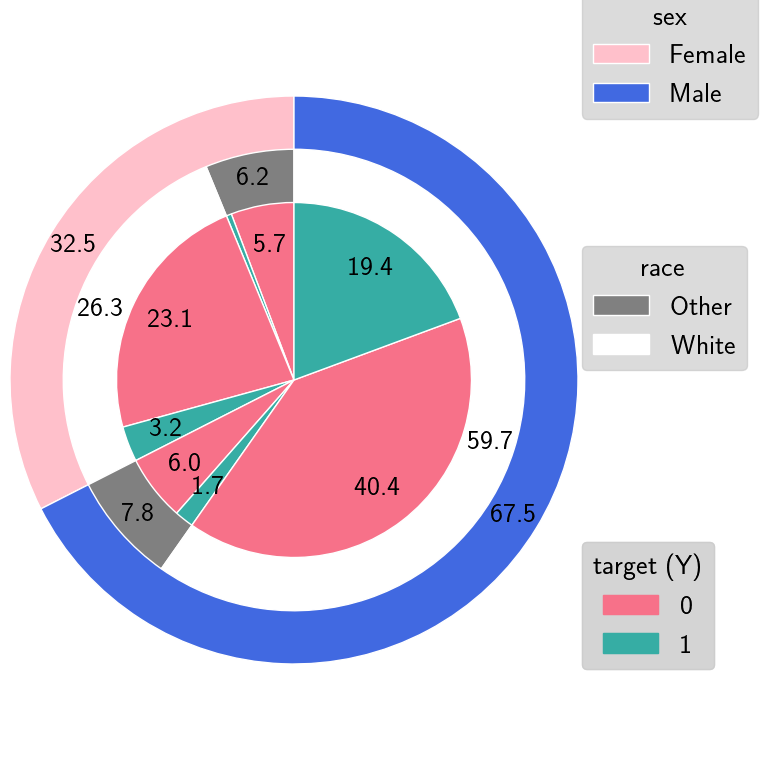

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Sample data creation (replace with your actual data)
# data = {
#     'sex': ['Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female'],
#     'race': ['White', 'Other', 'White', 'Other', 'Other', 'White', 'Other', 'White', 'Other', 'White'],
#     'income': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1]
# }
# df = pd.DataFrame(data)

# Grouping the data
# target = 'income'
grouped = df.groupby(['sex', 'race', target]).size().reset_index(name='count')

# Prepare data for nested pie chart
sex_counts = df['sex'].value_counts().sort_index()
race_counts = df.groupby(['sex', 'race']).size()
income_counts = df.groupby(['sex', 'race', target]).size()

# Prepare sizes for nested pie chart
sizes_sex = sex_counts.values

# Calculate sizes for race within each sex
sizes_race = []
for sex in sex_counts.index:
    sizes_race.extend(race_counts[sex].values)

# Calculate sizes for income within each race and sex
sizes_income = []
for sex in sex_counts.index:
    for race in race_counts[sex].index:
        sizes_income.extend(income_counts[sex, race].values)


r_s = 1.6
r_r = 1.3
r_i = 1


d_s = 0.91
d_r = 0.89
d_i = 0.77
# Color mappings
sex_colors_dict = {'Male': 'royalblue', 'Female': 'pink'}
race_colors_dict = {'White': 'white', 'Other': 'grey'}
income_colors_dict = {0: sns.color_palette("husl", 2)[0], 1: sns.color_palette("husl", 2)[1]}

# Assign colors
sex_colors = [sex_colors_dict[sex] for sex in sex_counts.index]
race_colors = [race_colors_dict[race] for sex in sex_counts.index for race in race_counts[sex].index]
income_colors = [income_colors_dict[income] for sex in sex_counts.index for race in race_counts[sex].index for income in income_counts[sex, race].index]

# Create nested pie chart
fig, axes = plt.subplots(ncols=2, sharey=True, width_ratios=[3, 1], figsize=(8,8))

ax = axes[0]
# Sex (outer circle)
pie_sex = ax.pie(sizes_sex, radius=r_s, colors=sex_colors, startangle=90, wedgeprops=dict(width=r_s, edgecolor='w'), autopct=lambda x: f'{x:.1f}' if x > 0 else '', pctdistance=(d_s))

wedges_sex = pie_sex[0]


# Race (middle circle)
pie_race= ax.pie(sizes_race, radius=r_r, colors=race_colors, startangle=90, wedgeprops=dict(width=r_r, edgecolor='w'), autopct=lambda x: f'{x:.1f}' if x > 0 else '', pctdistance=(d_r))
wedges_race = pie_race[0]


# Income (inner circle)
pie_income= ax.pie(sizes_income, radius=r_i, colors=income_colors, startangle=90, wedgeprops=dict(width=r_i, edgecolor='w'), autopct=lambda x: f'{x:.1f}' if x > 0.6 else '', pctdistance=(d_i))
wedges_income = pie_income[0]

import matplotlib.patches as mpatches

ax = axes[1]
unique_sexes = list(sex_counts.index)

# Sex legend
legend_sex = ax.legend(handles=wedges_sex, labels=unique_sexes, title="sex", loc='upper left', bbox_to_anchor=(-0.25, 1.04), facecolor='lightgrey', fontsize=20, title_fontsize=20)
ax.add_artist(legend_sex)

# Race legend
unique_races = list(race_counts.index.levels[1])
legend_race = ax.legend(handles=wedges_race[:len(unique_races)], labels=unique_races, title="race", loc='upper left', bbox_to_anchor=(-0.25, 0.7), facecolor='lightgrey', fontsize=20, title_fontsize=20)
ax.add_artist(legend_race)

# Income legend
unique_incomes = list(income_counts.index.levels[2])
legend_income = ax.legend(handles=[mpatches.Patch(color=income_colors_dict[income]) for income in unique_incomes], labels=unique_incomes, title="target (Y)", loc='upper left', bbox_to_anchor=(-0.25, 0.3), facecolor='lightgrey', fontsize=20, title_fontsize=20)
ax.add_artist(legend_income)

ax.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.rcParams['font.size'] = 20  # Adjusting the global font size

plt.savefig("../results/adult_distr.jpg", dpi=300, bbox_inches="tight", pad_inches=0)

plt.show()
